## Analyzing COVID-19 dataset with Python

In [1]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# The csv file of  the data below is present in the files of this repository 
#reading the data into a dataframe name covid_india
covid_india = pd.read_csv('covid_19_india.csv')

#displaying the top three records of the dataset
covid_india.head(3)  

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2


In [4]:
#checking for null values or '?' in the dataset 

covid_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
print(covid_india['Date'].min())
print(covid_india['Date'].max())

2020-01-30
2021-08-11


The dataset contains details of the pandemic from January'20 to August'21

In [6]:
##checking the range of the dataset and data types of the columns present

covid_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [7]:
#Droppig columns which will not be required for further analysis

covid_india = covid_india.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
covid_india.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [8]:
#feature engineering to keep track of ongoing covid cases

covid_india['Ongoing'] = covid_india['Confirmed'] - covid_india['Cured'] - covid_india['Deaths']
covid_india.tail()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Ongoing
18105,2021-08-11,8:00 AM,Telangana,638410,3831,650353,8112
18106,2021-08-11,8:00 AM,Tripura,77811,773,80660,2076
18107,2021-08-11,8:00 AM,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,8:00 AM,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,8:00 AM,West Bengal,1506532,18252,1534999,10215


In [9]:
# Grouping the data to show the aggreagate of the record details for a particular day in the entire country
g1 = covid_india.groupby(by='Date')
g1=g1[['Cured','Deaths','Confirmed']].sum().reset_index()

#displaying last 5 records  (to check the reduced number of records from the original dataframe)
g1.tail()

,Date,Cured,Deaths,Confirmed
555,2021-08-07,31055861,427371,31895385
556,2021-08-08,31099771,427862,31934455
557,2021-08-09,31139457,428309,31969954
558,2021-08-10,31180968,428682,31998158
559,2021-08-11,31220981,429179,32036511


In [10]:
#importing plotly library for visualizations

import plotly
import plotly.express as px

import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

In [12]:
#Using plotly library , creating a dynamic graph to view the Number of people who have tested  positive,died and recovered through the time period 
#place the cursor on top of the plot to view the date and and count of the three attributes present in a stacked layout

#can zoom in and zoom out to view specific time periods as well  [top right corner/ directly via plot]
# autoscale to return to original

#check the legend and if you wish to view only a certain attribute deselect the rest


plot1 = go.Figure(go.Bar(x= g1.Date, y= g1.Cured, name='Recovered'))
plot1.add_trace(go.Bar(x=g1.Date, y= g1.Deaths, name='Deaths'))
plot1.add_trace(go.Bar(x=g1.Date, y= g1.Confirmed, name='Covid positive'))

plot1.update_layout(barmode='stack',legend_orientation="v",legend=dict(x= 0.3, y=1),
                 paper_bgcolor="aliceblue",
                 plot_bgcolor = "white")

iplot(plot1)

In [13]:
#Changing the datatype from object for the 'Date' column in the dataset
covid_india['Date'] = pd.to_datetime(covid_india['Date'])

#new dataframe for the next plots
#max date data picked from the initial dataframe
covid_india_2 = covid_india[covid_india['Date']==covid_india['Date'].max()].copy()

# Setting the state column as the index of the dataframe
covid_india_2.index = covid_india_2['State/UnionTerritory']

#drop unwanted columns
covid_india_2 = covid_india_2.drop(['State/UnionTerritory','Time','Date'],axis=1)

#checking top 3 rows
covid_india_2.head(3)

,Cured,Deaths,Confirmed,Ongoing
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7412,129,7548,7
Andhra Pradesh,1952736,13564,1985182,18882
Arunachal Pradesh,47821,248,50605,2536


In [14]:
# Total Count 
covid_india_2.sum()

Cured        31220981
Deaths         429179
Confirmed    32036511
Ongoing        386351
dtype: int64

In [16]:
# Scatterplot using plotly to display the ongoing cases in each state and union territory

p = go.Figure()
p.add_trace(go.Scatter( x=covid_india_2.index,  y=covid_india_2.Ongoing, 
                        mode='lines+markers'))

iplot(p)

#hover over the plot line for exact number of cases
#can zoom in and zoom out to view specific  as well  [top right corner/ directly via plot by dragging selecting that section]

The state of Kerala (172.505k) appears to have the highest number of ongoing cases followed closely by Maharashtra(69.565k) then Karnataka (22.702k)and Tamil Nadu(20.363k).

In [17]:
# Counting the five states with highest number of deaths
top_5_deathcount = covid_india_2.sort_values('Deaths',ascending=False)[:5]
top_5_deathcount

,Cured,Deaths,Confirmed,Ongoing
State/UnionTerritory,,,,
Maharashtra,6159676,134201,6363442,69565
Karnataka,2861499,36848,2921049,22702
Tamil Nadu,2524400,34367,2579130,20363
Delhi,1411280,25068,1436852,504
Uttar Pradesh,1685492,22775,1708812,545


In [20]:
plot2 = px.bar(top_5_deathcount,top_5_deathcount.index,top_5_deathcount.Deaths,title='Top 5 states with the most number of deaths',
               labels={top_5_deathcount.index.name:'State Name',top_5_deathcount.Deaths.name:'Number of deaths(in thousands)'}
               ,color_discrete_sequence=['red'])

iplot(plot2)

Even though kerala has the most number of active covid cases ,it is not present in the highest states with the highest number of deaths which indicates a  good recovery rate for the state.

In [21]:
# Top 5 states w.r.t. confirmed cases

t5_conf = covid_india_2.sort_values('Confirmed',ascending=False)[:5]

In [22]:
# Bar plot for t5_conf

plot2 = px.bar(t5_conf,t5_conf.index,t5_conf.Confirmed,title='Top 5 states with the most number of Confirmed cases',
               labels={t5_conf.index.name:'State Name',t5_conf.Confirmed.name:'Number of confirmed cases(k)'}
               ,color_discrete_sequence=['orange'])
iplot(plot2)

#hover over the plot line for exact number of cases

In [23]:
# Bar plot for t5_conf
t5_cured =   covid_india_2.sort_values('Cured',ascending=False)[:5]

plot3 = px.bar(t5_cured,t5_cured.index,t5_cured.Cured,title='Top 5 states with the most number of Cured cases',
               labels={t5_cured.index.name:'State Name',t5_cured.Cured.name:'Number of cured cases(k)'}
               ,color_discrete_sequence=['green'])
plot3.update_layout(margin= dict(l=40,r=20,t=40,b=20),paper_bgcolor= 'AliceBlue')

iplot(plot3)

#hover over the plot line for exact number of cases

In [24]:
#  New dataframe for vaccination details

vacc_india = pd.read_csv('covid_vaccine_statewise.csv')
vacc_india.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [25]:
#  renaming the first column in vacc_india dataframe
vacc_india.rename(columns = {'Updated On':'Date'}, inplace = True)

In [26]:
#import the Prophet library 
from prophet import Prophet
# !pip show Prophet

from prophet.plot import plot_plotly,add_changepoints_to_plot,plot_components_plotly

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

In [27]:
forecast_m = Prophet()
confirmed = g1.loc[:,['Date','Confirmed']]
confirmed.tail(2)

,Date,Confirmed
558,2021-08-10,31998158
559,2021-08-11,32036511


In [28]:
cured = g1.loc[:, ['Date', 'Cured']] 
cured.tail(2)

,Date,Cured
558,2021-08-10,31180968
559,2021-08-11,31220981


In [29]:
deaths = g1.loc[:, ['Date', 'Deaths']] 
deaths.tail(2)

,Date,Deaths
558,2021-08-10,428682
559,2021-08-11,429179


In [30]:
# making predictions for next 7 days

confirmed.columns = ['ds','y'] #datestamp column,measure to forecast column
model = Prophet()
model.fit(confirmed)
 
future_week =model.make_future_dataframe(periods=7)
forecast_india_confirmed = model.predict(future_week)
#yhat --prediction
forecast_india_confirmed 

17:22:00 - cmdstanpy - INFO - Chain [1] start processing
17:22:01 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1.678992e+05,-1.600790e+06,1.541706e+06,-1.678992e+05,-1.678992e+05,20724.162674,20724.162674,20724.162674,20724.162674,20724.162674,20724.162674,0.0,0.0,0.0,-1.471750e+05
1,2020-01-31,-1.649042e+05,-1.686546e+06,1.467608e+06,-1.649042e+05,-1.649042e+05,15723.261996,15723.261996,15723.261996,15723.261996,15723.261996,15723.261996,0.0,0.0,0.0,-1.491809e+05
2,2020-02-01,-1.619092e+05,-1.770185e+06,1.374164e+06,-1.619092e+05,-1.619092e+05,10518.472304,10518.472304,10518.472304,10518.472304,10518.472304,10518.472304,0.0,0.0,0.0,-1.513907e+05
3,2020-02-02,-1.589142e+05,-1.747117e+06,1.415187e+06,-1.589142e+05,-1.589142e+05,4541.206695,4541.206695,4541.206695,4541.206695,4541.206695,4541.206695,0.0,0.0,0.0,-1.543730e+05
4,2020-02-03,-1.559192e+05,-1.754828e+06,1.357379e+06,-1.559192e+05,-1.559192e+05,-4041.464284,-4041.464284,-4041.464284,-4041.464284,-4041.464284,-4041.464284,0.0,0.0,0.0,-1.599606e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2021-08-14,3.667741e+07,3.522463e+07,3.837120e+07,3.667741e+07,3.667741e+07,10518.472303,10518.472303,10518.472303,10518.472303,10518.472303,10518.472303,0.0,0.0,0.0,3.668793e+07
563,2021-08-15,3.684230e+07,3.523699e+07,3.831518e+07,3.684230e+07,3.684230e+07,4541.206695,4541.206695,4541.206695,4541.206695,4541.206695,4541.206695,0.0,0.0,0.0,3.684684e+07
564,2021-08-16,3.700718e+07,3.539155e+07,3.858637e+07,3.700622e+07,3.700826e+07,-4041.464284,-4041.464284,-4041.464284,-4041.464284,-4041.464284,-4041.464284,0.0,0.0,0.0,3.700314e+07
565,2021-08-17,3.717207e+07,3.552805e+07,3.878685e+07,3.716961e+07,3.717700e+07,-18993.473316,-18993.473316,-18993.473316,-18993.473316,-18993.473316,-18993.473316,0.0,0.0,0.0,3.715308e+07


In [31]:
#interactive plot for forecast of a week,month,6 months,1 year entire time period of confirmed covid cases

plot4 = plot_plotly(model, forecast_india_confirmed) 
plot4.update_layout(template='gridon')
plot4.update_traces(line_color='orange')
iplot(plot4) 

In [32]:
mod2 = Prophet()
cured.columns = ['ds', 'y']
mod2.fit(cured)

f2 = mod2.make_future_dataframe(periods=7) 
f2.tail(3)

17:22:24 - cmdstanpy - INFO - Chain [1] start processing
17:22:24 - cmdstanpy - INFO - Chain [1] done processing


,ds
564,2021-08-16
565,2021-08-17
566,2021-08-18


In [33]:
forecast_india_cured = mod2.predict(f2)
forecast_india_cured.tail(3) #yhat--prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
564,2021-08-16,3.594169e+07,3.458009e+07,3.718052e+07,3.594167e+07,3.594173e+07,-7804.385894,-7804.385894,-7804.385894,-7804.385894,-7804.385894,-7804.385894,0.0,0.0,0.0,3.593389e+07
565,2021-08-17,3.611425e+07,3.473677e+07,3.741492e+07,3.611109e+07,3.611820e+07,-13574.429267,-13574.429267,-13574.429267,-13574.429267,-13574.429267,-13574.429267,0.0,0.0,0.0,3.610067e+07
566,2021-08-18,3.628680e+07,3.479400e+07,3.771437e+07,3.627845e+07,3.629564e+07,-21684.655121,-21684.655121,-21684.655121,-21684.655121,-21684.655121,-21684.655121,0.0,0.0,0.0,3.626512e+07


In [34]:
#plot for forecast of cured covid cases

plot6 = plot_plotly(mod2, forecast_india_cured) 

plot6.update_layout(template='plotly_white')
plot6.update_traces(line_color='green')
iplot(plot6) 

In [35]:

deaths.columns = ['ds','y']
mod3 = Prophet()
mod3.fit(deaths)
 
f3 =mod2.make_future_dataframe(periods=7)
forecast_india_deaths = mod3.predict(f3)
forecast_india_deaths #yhat --prediction

17:22:37 - cmdstanpy - INFO - Chain [1] start processing
17:22:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-2304.047461,-18003.659802,11969.665444,-2304.047461,-2304.047461,289.287247,289.287247,289.287247,289.287247,289.287247,289.287247,0.0,0.0,0.0,-2014.760215
1,2020-01-31,-2253.329406,-16674.509515,14397.522780,-2253.329406,-2253.329406,199.970650,199.970650,199.970650,199.970650,199.970650,199.970650,0.0,0.0,0.0,-2053.358756
2,2020-02-01,-2202.611350,-17374.523829,11400.273119,-2202.611350,-2202.611350,140.197660,140.197660,140.197660,140.197660,140.197660,140.197660,0.0,0.0,0.0,-2062.413690
3,2020-02-02,-2151.893295,-16445.069194,12583.779188,-2151.893295,-2151.893295,33.451795,33.451795,33.451795,33.451795,33.451795,33.451795,0.0,0.0,0.0,-2118.441499
4,2020-02-03,-2101.175239,-17029.470528,12961.752553,-2101.175239,-2101.175239,-97.147441,-97.147441,-97.147441,-97.147441,-97.147441,-97.147441,0.0,0.0,0.0,-2198.322680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2021-08-14,484413.566555,470365.317383,498921.336642,484413.566555,484413.566555,140.197660,140.197660,140.197660,140.197660,140.197660,140.197660,0.0,0.0,0.0,484553.764216
563,2021-08-15,486826.128577,472491.128649,502507.779085,486826.128577,486826.128577,33.451795,33.451795,33.451795,33.451795,33.451795,33.451795,0.0,0.0,0.0,486859.580372
564,2021-08-16,489238.690599,474636.694334,503715.931649,489238.690599,489269.836819,-97.147441,-97.147441,-97.147441,-97.147441,-97.147441,-97.147441,0.0,0.0,0.0,489141.543158
565,2021-08-17,491651.252620,477277.951328,505433.492836,491631.007506,491740.212712,-261.770919,-261.770919,-261.770919,-261.770919,-261.770919,-261.770919,0.0,0.0,0.0,491389.481702


In [36]:
#interactive plot displaying the number of deaths in the country for a week,a month, 6 months ,1yr and the overall trend.

plot6 = plot_plotly(mod3, forecast_india_deaths) 

plot6.update_layout(template='gridon')   #setting the template style
plot6.update_traces(line_color='red')          #setting the colour of the trace
iplot(plot6) 

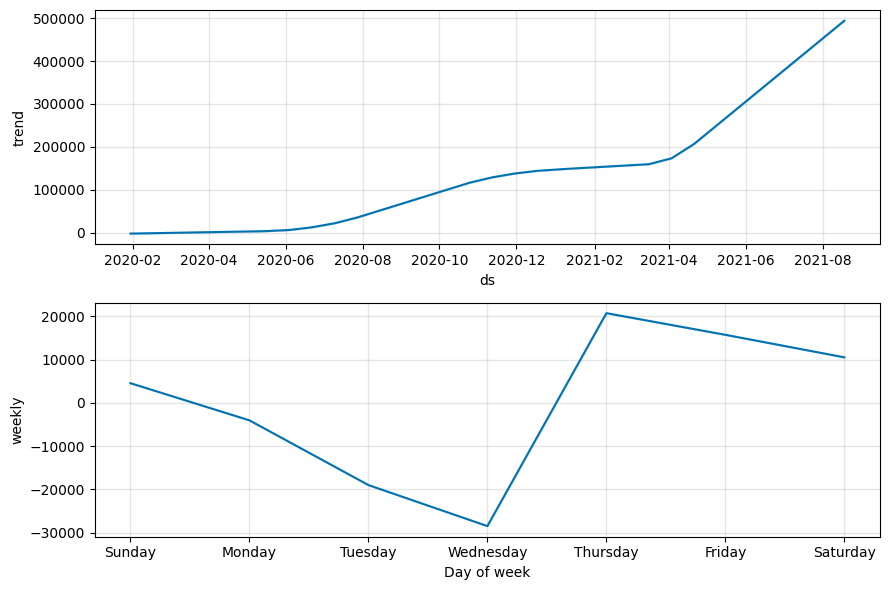

In [37]:
# forecast components to see the trend and weekly seasonality of the time series.

fig = model.plot_components(forecast_india_deaths) 